#### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,resting blood pressure, serum cholesterol, and maximum heart rate achieved.Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

#### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [6]:
x=data.drop('target',axis=1)
y=data['target']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
random_classifier=RandomForestClassifier(n_estimators=100,max_depth=10)

In [11]:
random_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

#### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [13]:
y_pred=random_classifier.predict(x_test)

In [14]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1])

In [15]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F-1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.8241758241758241
Precision: 0.84
Recall: 0.84
F-1 Score: 0.8399999999999999


#### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [16]:
importances=random_classifier.feature_importances_
features_name=x.columns

In [17]:
important_features=pd.DataFrame({'Feature':features_name,'Importance':importances})

In [18]:
important_features=important_features.sort_values(by='Importance',ascending=False)

In [19]:
top_features=important_features.head()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

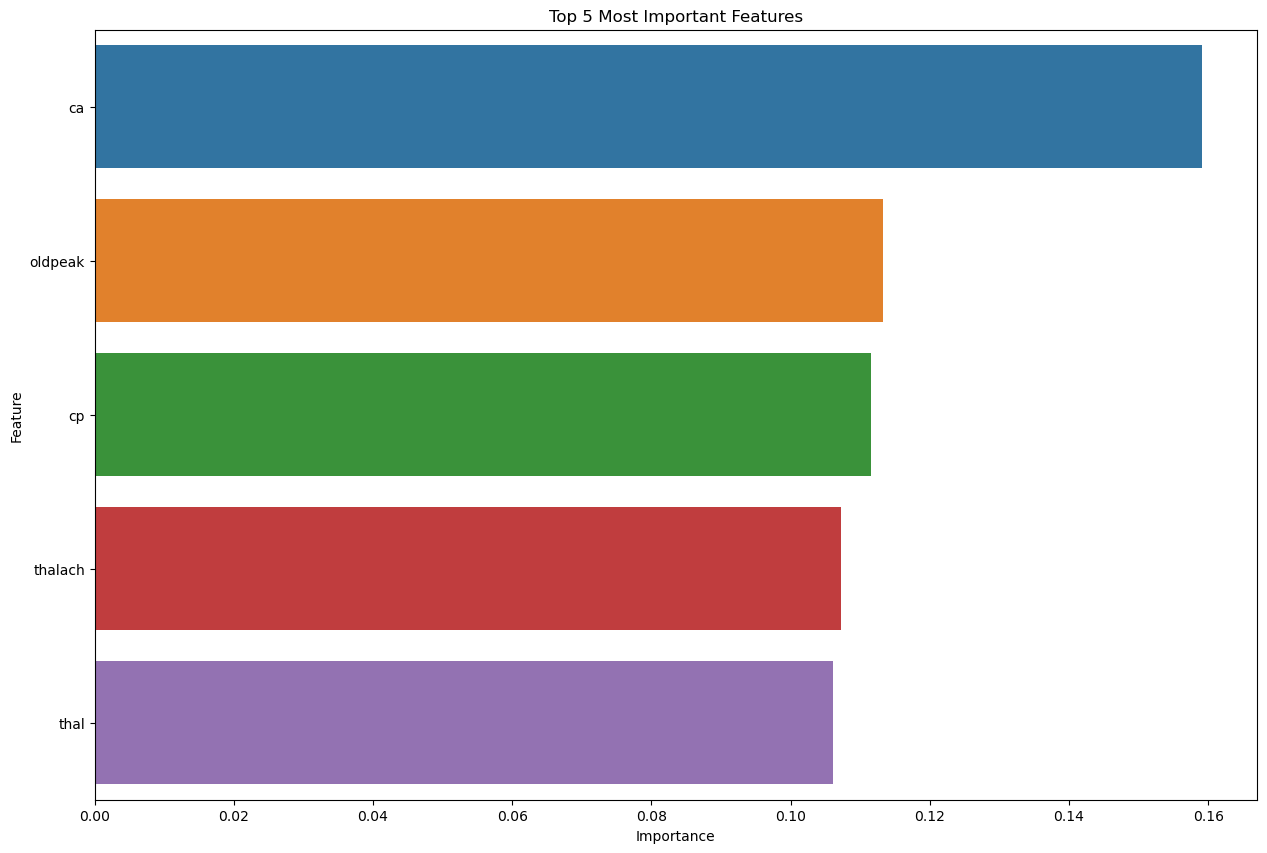

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x='Importance',y='Feature',data=top_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features')
plt.show()

#### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [22]:
data1=pd.read_csv('dataset.csv')

In [23]:
x1=data1.drop('target',axis=1)
y1=data1['target']

In [24]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
parameter = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
grid_search=GridSearchCV(estimator=random_classifier,param_grid=parameter,cv=5)

In [28]:
grid_search.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

#### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [32]:
best_params=grid_search.best_params_

In [33]:
best_rf_classifier=RandomForestClassifier(**best_params)

In [34]:
best_rf_classifier.fit(x1_train,y1_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)

In [35]:
y1_pred=best_rf_classifier.predict(x1_test)

In [36]:
y1_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1])

In [37]:
print("Accuracy:",accuracy_score(y1_test,y1_pred))
print("Precision:",precision_score(y1_test,y1_pred))
print("Recall:",recall_score(y1_test,y1_pred))
print("F-1 Score:",f1_score(y1_test,y1_pred))

Accuracy: 0.8351648351648352
Precision: 0.8301886792452831
Recall: 0.88
F-1 Score: 0.8543689320388349


#### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [40]:
import numpy as np

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


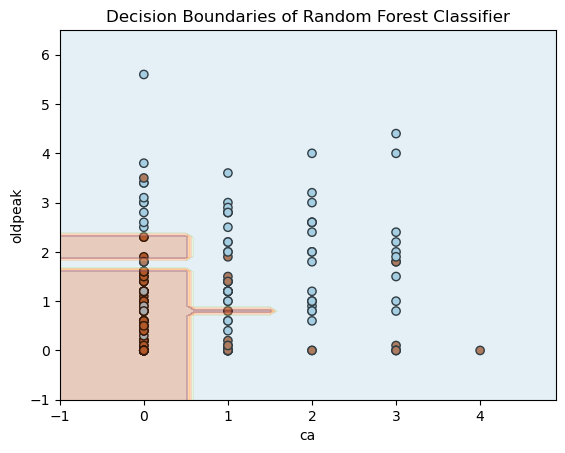

In [41]:
# Select two most important features
feature1 = top_features.iloc[0]['Feature']
feature2 = top_features.iloc[1]['Feature']

# Extract the corresponding columns from the training set
X_subset = x1_train[[feature1, feature2]]

# Fit the random forest classifier on the selected features
best_rf_classifier.fit(X_subset, y_train)

# Define the range of values for the two features
x_min, x_max = X_subset[feature1].min() - 1, X_subset[feature1].max() + 1
y_min, y_max = X_subset[feature2].min() - 1, X_subset[feature2].max() + 1

# Create a meshgrid of points within the range
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class labels for each point in the meshgrid
Z = best_rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the data points
plt.scatter(X_subset[feature1], X_subset[feature2], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Add labels and title to the plot
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries of Random Forest Classifier')

# Show the plot
plt.show()
